In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from lsst.cwfs.tools import ZernikeEval, ZernikeGrad
import matplotlib.colors as colors

mpl.rc('image', cmap='jet')

In [2]:
#set up the pupil
x1d = np.linspace(-1,1,201)
x, y = np.meshgrid(x1d, x1d)
r = np.sqrt(x**2 + y**2)
idx = r>1
x[idx] = np.nan
y[idx] = np.nan
r[idx] = np.nan

Text(0.5, 0.98, 'Wavefront maps (W)')

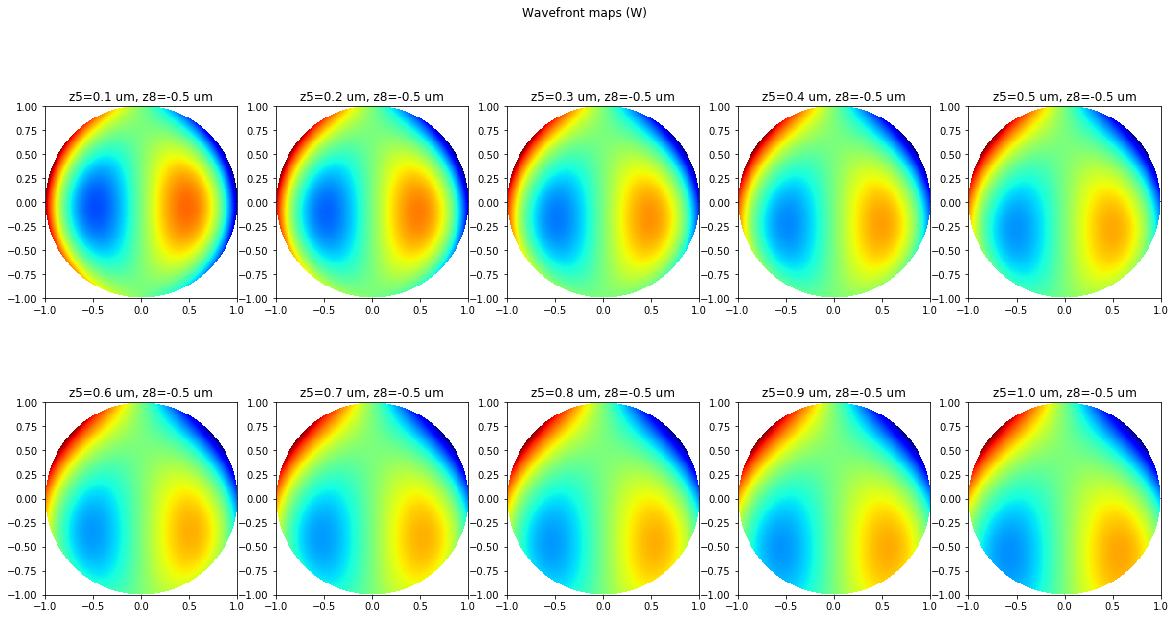

In [3]:
#our wavefront only has two Zernike components z5 and z8
z5 = np.linspace(0.1,1,10)
z8 = -0.5
zc = np.zeros([10, 8])
zc[:,8-1] = z8
zc[:,5-1] = z5
w = np.zeros([10,201,201])
for i in range(10):
    w[i,:,:] = ZernikeEval(zc[i,:], x, y)
fig, ax = plt.subplots(2,5, figsize = (20,10))
for i in range(10):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    #print(irow, icol)
    ax[irow][icol].imshow(w[i,:,:], extent=[min(x1d), max(x1d), min(x1d), max(x1d)])
    ax[irow][icol].set_title('z5=%.1f um, z8=%.1f um'%(z5[i], z8))
    
fig.suptitle('Wavefront maps (W)')

Text(0.5, 0.98, 'Wavefront x-gradient (dW/dx)')

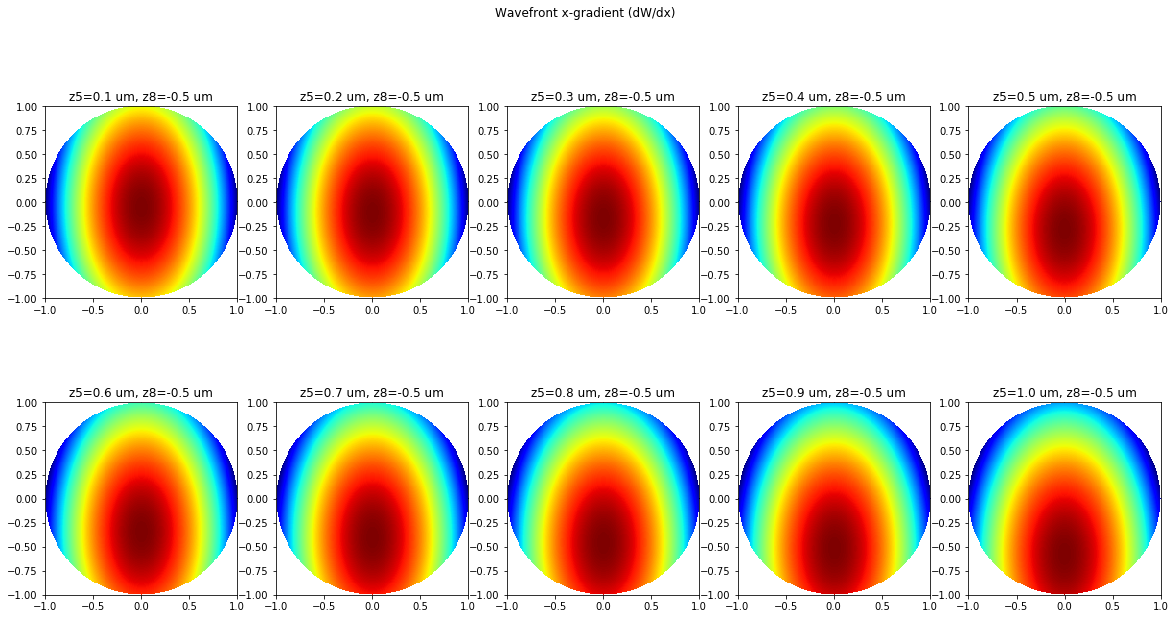

In [4]:
dwdx = np.zeros([10,201,201])
dwdy = np.zeros([10,201,201])
for i in range(10):
    dwdx[i,:,:] = ZernikeGrad(zc[i,:], x, y, 'dx')
    dwdy[i,:,:] = ZernikeGrad(zc[i,:], x, y, 'dy')
fig, ax = plt.subplots(2,5, figsize = (20,10))
for i in range(10):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    #print(irow, icol)
    ax[irow][icol].imshow(dwdx[i,:,:], extent=[min(x1d), max(x1d), min(x1d), max(x1d)])
    ax[irow][icol].set_title('z5=%.1f um, z8=%.1f um'%(z5[i], z8))
    
fig.suptitle('Wavefront x-gradient (dW/dx)')

Text(0.5, 0.98, 'Wavefront y-gradient (dW/dy)')

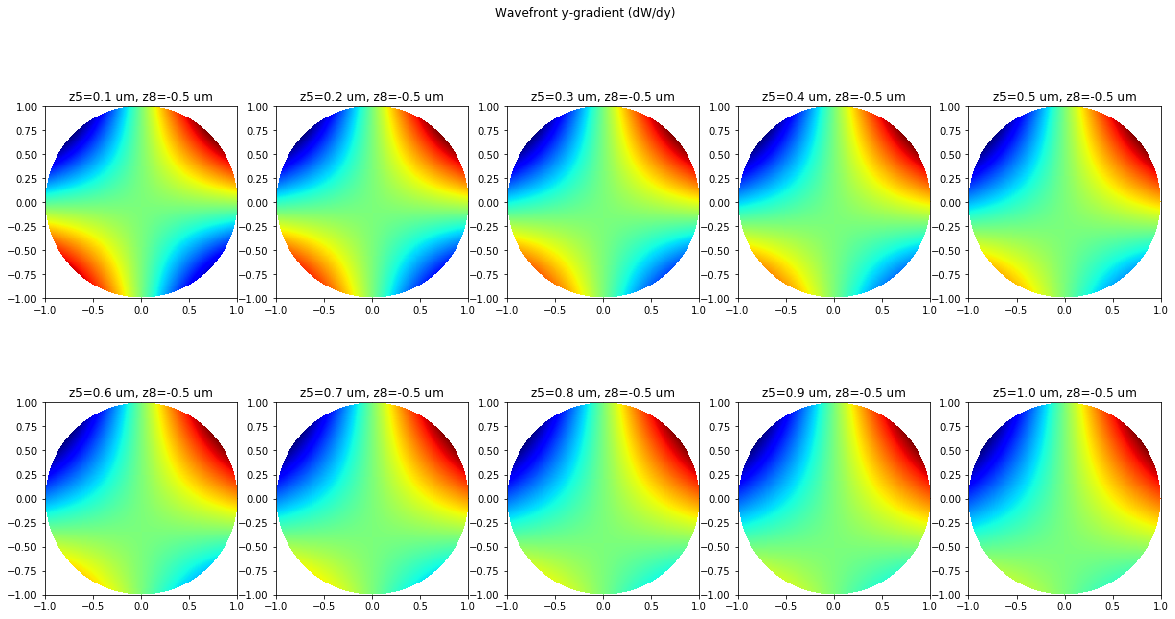

In [5]:
fig, ax = plt.subplots(2,5, figsize = (20,10))
for i in range(10):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    #print(irow, icol)
    ax[irow][icol].imshow(dwdy[i,:,:], extent=[min(x1d), max(x1d), min(x1d), max(x1d)])
    ax[irow][icol].set_title('z5=%.1f um, z8=%.1f um'%(z5[i], z8))
    
fig.suptitle('Wavefront y-gradient (dW/dy)')

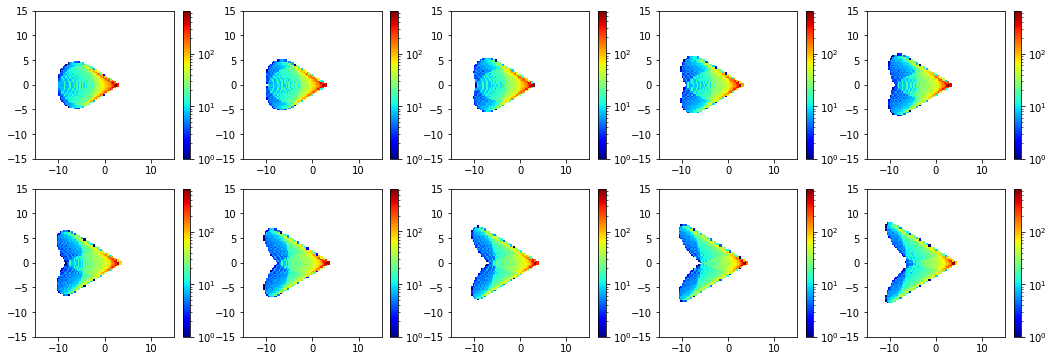

In [6]:
rmsSpotSize = np.zeros(10)
fig, ax = plt.subplots(2,5, figsize = (18,6))
for i in range(10):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    xr = dwdx[i,:,:].reshape(-1,1)
    yr = dwdy[i,:,:].reshape(-1,1)
    idx = ~np.isnan(xr)
    xr = xr[idx]
    yr = yr[idx]
    rmsSpotSize[i] = np.sqrt(np.sum(xr**2 + yr**2))
    counts, xedges, yedges, img = ax[irow][icol].hist2d(xr, yr, bins=100, norm=colors.LogNorm(), range=[[-15, 15], [-15, 15]])
    fig.colorbar(img, ax=ax[irow][icol])

Text(0, 0.5, 'RMS spot size')

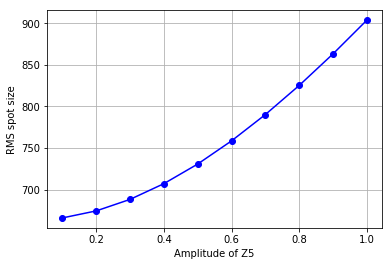

In [7]:
plt.plot(z5,rmsSpotSize,'-bo')
plt.grid()
plt.xlabel('Amplitude of Z5')
plt.ylabel('RMS spot size')